# Better amd fast asin

## Setup PATH

In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

## Import all the things

In [2]:

import fpcore
import lambdas

from interval import Interval
from lambdas import *
from numeric_types import FP64
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda
from fpcore.interface import *

In [3]:
x = var("x")
samples = 2**17

## Find linear cutoff

Let's find where $\sin^{-1}(x) = x$ is a good approximation

The black line is correctly rounded, so we want to find when the two lines split.

2.1491193328907396e-08


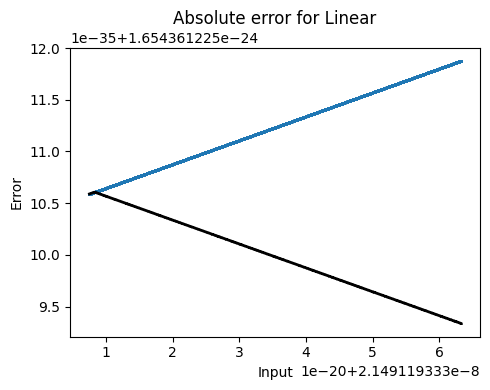

In [4]:
# Linear approximation
linear = \
    Horner(
        FixedPolynomial(
            fpcore.parse("(FPCore (x) (asin x))"),
            Interval("0", "0.5"),
            [1],
            [1]))

# Low and high for our graph
l = 2**-26 + 2**-28 + 2**-29 + 2**-30 + 2**-34 + 2**-37 + 2**-38 + 2**-40 \
    + 2**-41 + 2**-42 + 2**-44 + 2**-48 + 2**-51 + 2**-54 + 2**-58 \
    + 2**-61 + 2**-65 + 2**-66 + 2**-67 + 2**-68 + 2**-69
h = 2**-26 + 2**-28 + 2**-29 + 2**-30 + 2**-34 + 2**-37 + 2**-38 + 2**-40 \
    + 2**-41 + 2**-42 + 2**-44 + 2**-48 + 2**-51 + 2**-54 + 2**-58 \
    + 2**-61 + 2**-63

# Plot and print our low
p = plot_lambda(Interval(l, h), linear, "Linear", samples)
print(l)

We found that the two lines diverge somewhere above 2.1491193328907396e-08,
so below that bound the function is close enough to linear for double precision.

Set our domain

In [5]:
dom = Interval(l, 0.5)

## Existing Polynomial

In [6]:
old = Estrin(
        FixedPolynomial(
            fpcore.parse("(FPCore (x) (asin x))"),
            Interval("0", "0.5"),
            [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
            ["1",
             "0.1666666666666477004",
             "0.07500000000417969548",
             "0.04464285678140855751",
             "0.03038196065035564039",
             "0.0223717279703189581",
             "0.01736009463784134871",
             "0.01388184285963460496",
             "0.01218919111033679899",
             "0.00644940526689945226",
             "0.01972588778568478904",
             "-0.01651175205874840998",
             "0.03209627299824770186", ]),
        split=1)

## First attempt
compare the results

array([<Axes: title={'center': 'Absolute error for Existing'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V0'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

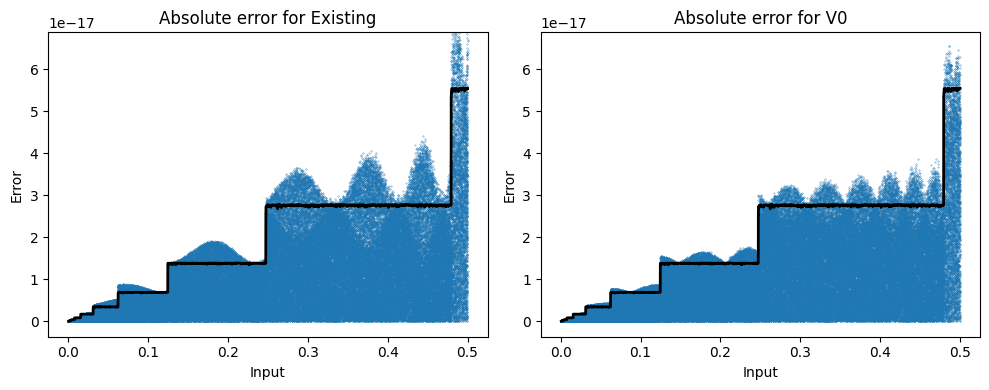

In [7]:
v0 = \
    Estrin(
        MinimaxPolynomial(
            make_function([x], asin(x)),
            dom,
            13
        ),
        split=1
    )
compare_plot_lambda(dom, old, v0, "Existing", "V0", samples)

## Estrin vs Horner
Does it make a difference?

array([<Axes: title={'center': 'Absolute error for V0'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for V1'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

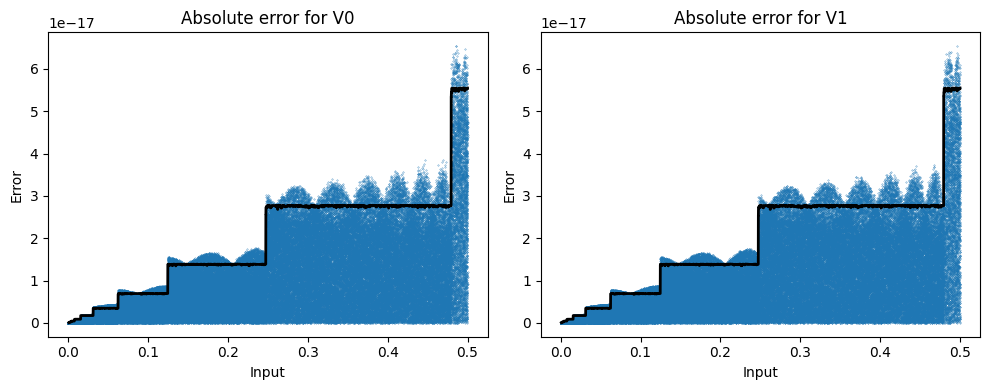

In [8]:
v1 = \
    Horner(
        MinimaxPolynomial(
            make_function([x], asin(x)),
            dom,
            13
        ),
        split=1
    )
compare_plot_lambda(dom, v0, v1, "V0", "V1", samples)